# Experiment 1: Topic Classification
## Source Task: huffpost
## Target Task: yinetal

In [1]:
from flair.models.text_classification_model import TARSClassifier
from flair.data import Sentence
import pandas as pd 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# GRAKA auswählen
import flair, torch
flair.device = torch.device('cuda:0') 

# Labelbezeichner: Oneword

In [3]:
base_path = '/vol/fob-vol7/nebenf19/samahakk'
#base_path = !pwd
base_path = base_path + '/masterarbeit_experiment2'

In [4]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_yin/oneword/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_huffpost/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "Family & Relationships",
    "Health",
    "Science & Mathematics",
    "Entertainment & Music",
    "Computers & Internet",
    "Education & Reference",
    "Sports",
    "Society & Culture",
    "Business & Finance",
    "Politics & Government",
]

for sentence in text:
    try:
        sequence = Sentence(sentence)
    except:
        sequence = Sentence("test test test")

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)


# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-09-08 15:20:18,459 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/topic_huffpost/model/best-model.pt
init TARS
Sentence: "does any body go to robert c. cooley middle school ? just wonderin NO NO NO CLUE EVEN WHERE DAT IS"   [− Tokens: 21  − Sentence-Labels: {'label': [Education & Reference (0.6278)]}]
Sentence: "I ca n't sell my home but need to leave town for a new job . Can i get a Home equity loan and default on it ? If i default on the Home equity loan will I have to pay it off or will the equity in the house I lose to foreclosure cover it ? I think I can get a 40,000 HEL . I ' ll use that money to make a down payment on a new house in my new location . Am I obligated to pay off the HEL or will giving up my old house take care of it . thank you Two points for you to ponder : 1 ) Take out a `` bridge '' loan so that you can afford a down payment on a new home while your home is on the market.2 ) Look into ERA ' s Seller ' s Security Plan . They can either

Sentence: "Anyone know about filing TAXES ? ? ? ? My boss gave me my W-2s and I went to H & R block to file them I am going to be getting 3,0000 back . But I need to know what my boss needs to do on her part what she needs to send out ect ... because its blocking me from getting my money.ANYONE PLEASE HELP so I can let my boss know what she needs to do . so sorry to hear that your boss is holding you up on filing your taxes . they ( employers ) need to follow up on getting a copy of your income to the irs and to you . so once they figure out the w-2 , they keep a copy and send a copy to the irs , and give you a copy.far as i know their responsibility ends there , until they file their own taxes , but that has nothing to do with you.hope this helps.good luck"   [− Tokens: 169  − Sentence-Labels: {'label': [Health (0.9791)]}]
Sentence: "how can i stop smoking , is there is any way to help me with it plz ? ive been smooking since 10 years , and im 29 , so how can i quit , its realy hard t

Sentence: "How can I be better ? I am a secretary for a pretty small company . I have always thought that I was doing good at my job ( I do n't do anything wrong at least ) but recently I have been getting the feeling that my boss is frustrated with my performance . What can I do to show him that I am trying ? I LOVE my job , and I really do want to do my best at it ... do you have any suggestion ? Not only to show him , but maybe little things that make a big difference ? Thank you for your help ! ! Be pro-active and an `` out-of-the-box '' thinker . Try and find things that could help the office out in general , like time saving ideas or streamlining things to make production better ."   [− Tokens: 147  − Sentence-Labels: {'label': [Business & Finance (0.8818)]}]
Sentence: "Finances why do people put emphasis on credit so much ? I teach a class that helps people break the cycle of debt that keeps families in turmoil . Why are Americans so inclined to start this destructive cycle of b

Sentence: "How to Make Your Friends Believe You ' re a Computer Geek ? Read up on the lingo , and shockingly ... learn something about computers ."   [− Tokens: 27  − Sentence-Labels: {'label': [Computers & Internet (0.9807)]}]
Sentence: "how to copy a video clipping shown in media player in a compact disk or floppy or save it in your hard disk ? very often we find interesting materials in the form of video clippings sown in our windows media player . Is there a way to copy the video presentation in a compact disc , floppy or in our computer hard disk itself ? You may find video clipping softwares on the internet . I do understand the true request , but remember that this could be illegal ! If you make it for your private use , then simply possible . But not for public exhibit . ( I meant about copy righted Media ) . Best software for your job is , simply VCD Cutter . Sorry that i could n't attach a link . Simply search it on any powerful Search Engine . This software is very dynamic .

Sentence: "How many people are working their way through college ? Any advice on stress relief ? I worked on campus getting my undergrad and while finishing my M.Ed . I work in the schools . Stress relief is perhaps on a day off from work / school ( yes i know its hard ) take a break from those hours of studying if possible and go shopping or get a massage . I ' d not advise it right before finals or a big project * grins * Perhaps if you go to school away from home , try to get Monday assignments done before going home for the weekend and just enjoying being with family . Be serious about your job , but if its not the area you plan to work in after college , just keep telling yourself its only for a little while . Look what I ' m accomplishing and where I wo n't have to work until I retire . That ' s a stress relief in itself ."   [− Tokens: 175  − Sentence-Labels: {'label': [Health (0.9446)]}]
Sentence: "should i study in summer ? ? Please tell me i ' m going to 11th grade and i do n

Sentence: "Is this sentence correct ? `` Is there any room for me in the car ? '' ? This sentence is correct . There a verb , the verb is `` is '' . Is there room ? `` Is there any room ? '' is correct , although the `` any '' is not needed.Perhaps `` Is there room for me in the car is preferable '' , but your sentence is fine.After all , think of this sentence : `` You can stay with us if there is room '' . A perfectly acceptable response would be , `` Is there any ? '' , Is there any `` what '' ? Is there any room ? An analogous sentence is `` Is there any cake left ? '' Is there any cake for me in the refrigerator ? All are good sentences using `` any '' ."   [− Tokens: 150  − Sentence-Labels: {'label': [Health (0.9697)]}]
Sentence: "Are there cheerleaders at cal state east bay , if so , is there a website that I can go to , to see them ? I am a junior and I am going to be a senior next year . This is my last week of school and I want to start to collge search now. - Thanks - Go to 

Sentence: "Road Rage Survey ? 1 . ) Do you often experience road rage ? If so , what bothers you the most ? 2 . ) For those of you who live in states that receive alot of snowfall - Does it upset you when people drive crazy when the roads are noticeably slippery ? 3 . ) What does your ' road rage ' consist of ? My views - The only time I experience road rage is when another driver does something stupid that could endanger my life , such as driving crazily in the wintertime when the roads are slippery . It makes me mad ! If only people would leave a few minutes early when road conditions are like that , they would n't have to rush . 1 . Yes , but it takes more than a couple people to piss me off . It just sort of builds up until I explode . What bothers me the most is people pulling out in front of me ESPECIALLY WHEN THERE IS NO ONE BEHIND ME AND THEY COULD HAVE WAITED THE EXTRA TWO SECONDS and what makes that worse is getting in front of me and then going SLOWER . And rubberneckers . T

Sentence: "What is the funniest prank that someone you know has pulled ? My friend J.R. and I were riding in the backseat of another friends car and he some how start making the sound a flat tire . I have no idea how he did it but it was really convincing as he matched the speed of the car and everything . She , the driver , starts freaking out and pulls over to check all 4 tires which were fine . By this time we were cracking up . Oh , where to begin ... I ' ve pulled so many ! Well , riding in a pick up with guy driving , guy in the middle and me in the passenger seat , as we were stopping at a busy intersection I ducked down so no one could see me . hehehe Put clear cellophane tape on the lenses of a coworkers glasses and watched him try to clean them about 15 times before he figured out why he could n't see out of them ! That was great . He tried to retaliate by locking my bag in a cabinet . Even took lunch early so he ' d be back in time to be there when I left . I noticed the pad

Sentence: "how v can know that ( in males ) the one who is having sex ... is his 1st time ? in males is there any way to find out that this is his 1st time ( during sex ) . however it is between the ones in love ? maybe , if they have no clue what there doing , but then again maybe not some have experienced it yet still do n't know what there doing ."   [− Tokens: 79  − Sentence-Labels: {'label': [Health (0.2606)]}]
Sentence: "how long does the intercourse usually last when it ' s your first time having sex ? IF ITS YOUR FIRST TIME HAVING SEX , HOW LONG WILL YOU GO AT IT ? It depends on the person that you are with and it also depends on how long you want it to be and how long you can make it . Some times it can be hours or some times it will only last for a few minutes . It depends ."   [− Tokens: 83  − Sentence-Labels: {'label': [Health (0.9561)]}]
Sentence: "Fun games to play in bed ? Any suggestions ? Looking to surprise my boyfriend with some games tonight . Got any suggestions ? 

Sentence: "How do u tell a guy that u dont like him ? but without hurting his feelings Begin with praise and honest appreciation . THen be frank and tell him the truth . Then let him save his face . Give him a fine reputation to live up to ."   [− Tokens: 50  − Sentence-Labels: {'label': [Health (0.8253)]}]
Sentence: "can depression kill you ? ? ? serious answers plzzzzzzzzzzzzzz ! ! Depression can lead to other things that can kill you . Aside from suicide itself , depressed people tend to have eating disorders - either too much or too little ( each bringing with it its own set of problems ) and sleeping disorders - either too much or too little ( again each with its own set of problems ) . Depressed people turn to drugs and alcohol to cover the pain - again we know the problems these carry with them . Depression can take over your life making you dead inside long before a physical death comes to you ."   [− Tokens: 115  − Sentence-Labels: {'label': [Science & Mathematics (0.9846)]}]


Sentence: "Are colonics safe ? Colonic irrigation can potentially cause severe adverse effects and must be carefully administered . People receiving frequent treatments may absorb too much water , leading to electrolyte imbalances in the blood , nausea , vomiting , heart failure , fluid in the lungs , abnormal heart rhythms or coma . Infections have been reported , possibly because of contaminated equipment or as a result of clearing out normal colon bacteria . There is a risk of bowel perforation ( breakage of the bowel wall ) , which is a severe complication . Deaths have been reported . Colonic irrigation should not be used in people with diverticulitis , ulcerative colitis , Crohn ' s disease , severe or internal hemorrhoids or tumors in the rectum or colon . It also should not be used soon after bowel surgery ( unless directed by your health care provider ) . Regular treatments should be avoided by people with heart disease or kidney disease ( renal insufficiency ) . Be sure that 

Sentence: "Is taking Phentermine and paxil safe ? ? Does your doctor know ? It ' s much safer to tell your doctor that you ' re on Paxil before starting Phentermine as they could interact harmfully . I personally would not advocate mixing the two . Here ' s a link on precautions to take with both Phentermine & Paxil . They ' re the official NIH views on the subject"   [− Tokens: 71  − Sentence-Labels: {'label': [Health (0.9884)]}]
Sentence: "I am a 160 pound 5'4 ninth grader that NEEDS to loose weight ! ? If i do not loose weight soon , i will loose my whole freshman year to mean bullies who make fun of me ! Please help me ! ! ! if you really WANT THIS BAD then your gon na have to WORK HARD FOR IT . not just think `` oh if i skip this meal then i can have a chocolate cake for dessert '' . or if your gon na end up giving up why even try to lose weight ? first of all you need to watch what ur eating . no more snacking on all that unhealthy stuff . eat an apple if your hungry . next you n

Sentence: "What do you guys think of this ? News reports say that the Israelis rejected a peace proposal from the Europeans , regarding the Israeli Palestinian conflict . What do you think that the Israeli government wants out of all thier militaristic approaches ? Is the Israeli government an extremist organization ? Look at the link below . http : // www.aljazeera.com / me.asp ? service _ ID = 12553 As long as there is Israel and Palestine , they will be fighting . Neither is right as far as I can see , this conflict goes back thousands of years . To be fair , look at your source ; Al Jazeera saying negative things about israel is about as shocking as Fox News ripping on democrats ."   [− Tokens: 129  − Sentence-Labels: {'label': [Computers & Internet (0.9075)]}]
Sentence: "Is there a free search engine to gov . grants for an individual ? Yes there is a free database on government grants - but government hardly give grants to individuals . Most of the federal grants are given to spec

Sentence: "Do you think the system of wealth distribution in the US is fair ? Does capitalism fairly reward everyone based upon their contribution to society ? Is Bill Gates or Warren Buffett 1,000,000 times more talented or worthy than the nurse who bandaged your child ' s knee ? Capitalism is n't about fairness . Fairness is a child ' s version of the concept of Justice . The world , and capitalism , is not fair . But capitalism is just . Those who make the effort , have the creativity , have the intellegence , the strength , the wisdom , the ( fill in the blank with at least something that is of value ) get to keep the money and decide where to spend it.No , they are n't `` worth '' that much . No one is worth anything . Another childhood concept is believing that we are owed something for our good deeds , and then we define `` good '' as anything we want to . Silly.The system is the most open in the world for people to figure out the rules and make themselves rich as well . No othe

Sentence: "How long can we go without sleep ? The longest I ' ve ever stayed up is about 36 hours , but people can stay up a lot longer than that.Even staying up just a few hours later than you normally go to bed you start to have decreased cognitive function , blurry vision , etc . That stuff increases the longer you stay up . There ' s never been a documented case of a healthy person dying from sleep deprivation , but rats die after about 28 days without sleep . People with a certain type of genetic insomnia sometimes die after several months without sleep.The longest people have stayed up in monitored experiments is 10 days , and they had less memory and concentration and stuff after a long time without sleep , but no serious health problems ."   [− Tokens: 142  − Sentence-Labels: {'label': [Health (0.9665)]}]
Sentence: "why do you place the tubes to be used in sterile transfer near to Bunsen burner flame ? tell me faster pls ? pay attention in class , I am sure you were told there 

Sentence: "solve this chemistry enigma ? ? plzzzzzzzzz ... ? an organic compound A of molecular formula C2H6O on oxidation gives an acid B with the same no of carbon atoms as A . compound A is often used for STERLIZISATION OF SKIN by doctors . name the compund A AND B . WRITE THE CHEMICAL EQUATION involved in the formation of B from A . IT would be helpful if u tell be what is sterilization of skin ? ? ? ? ? ? ? ? ? Your compound A is ethanol : H3C-CH2OH . It is an alcohol which can be used for sterilizing ( killing germs ) on surfaces . Ever see an old western movie where they get a bottle of whiskey and dribble some over the knife blade before they start to cut open the wound to remove the arrow ? That ' s what ethanol can do.By oxidizing ethanol , you can create ethanoic acid , otherwise known as acetic acid : H3C-C ( O ) - OHH3CCH2OH + O2 ====== > H3C-C ( O ) OH + H20"   [− Tokens: 184  − Sentence-Labels: {'label': [Health (0.97)]}]
Sentence: "hey how do i get into ISI ( indian sta

Sentence: "PLACE where you like to go AGAIN AND AGAIN and stay there LONG ? this place must be such that it is possible for you to visit it once in a week so no tourist place please , give your number or name 1 home 2 garden 3 playground 4school 5 collage 6 your work place 7 river bank 8 beach 9 religious place 10 club 11 hobby center 12 in wild / jungle Ocean ! !"   [− Tokens: 77  − Sentence-Labels: {'label': [Society & Culture (0.9443)]}]
Sentence: "Would you die for our sins on a cross like Jesus did ? Only the son of God , the messiah can do this ."   [− Tokens: 25  − Sentence-Labels: {'label': [Entertainment & Music (0.002)]}]
Sentence: "What does this mean ? And what language ? Ini Ibi Kita ... might not have spelled it just right . I ' m definitely sure that ' s Tagalog ( from the Philippines ) . It ' s spelled as `` Iniibig kita . '' And yes , it does mean `` I love you . ''"   [− Tokens: 58  − Sentence-Labels: {'label': [Entertainment & Music (0.1099)]}]
Sentence: "What is you

Sentence: "Will having one black family in my neighborhood bring down the whole neighborhood ' s value ? Well , I ' m only 17 , I ' m not selling a house or anything ( Duh . ) But there is this family that moved in my neighborhood and they ' re black . The houses are really expensive and I was just wondering will that one family bring down the whole neighborhood value ? Because I ' ve seen this happen before. . Green Island Hills. . yeah no one wants to move over there anymore. . Why do they have to ruin such good , influential and well mannered neighborhoods ? Edit : I did ask this in the Business section , but I think only black people were answering the question , since the answers were a little race-biased . Having a black family in your neighborhood will not bring anyone ' s neighborhood value down . Sadly enough , usually when a black family moves in , you will find out who the biggest bigot is first . Because they will be the first to leave . By you being 17 years old , you have

Sentence: "what are some cool tricks to do with a tennis raquet ? I need to impress my coach with some cool trick . Please Help ! ! ! Walk the dog is a trick where you are basically using the tennis ball like a basketball bouncing it between your legs as you walk . Spinning the racket on your finger is self explanitory . Catching a ball in mid flight without a bounce requires you to catch and cradle the ball as you turn the racket over while decelerating the ball in harmony with the take back of your racket . Throwing your racket in the air spinning fast and catching the handle a la Hicham Arazi the magician , is the best I have ever seen at this . Also there is spinning the racket around your neck and onto your other hand , which is very difficult and I have only known a couple of players that could do it . There is some other tricks to , but explaining the racket motion requires a lot of typing and is not easily explained without having seen it done in person ."   [− Tokens: 193  − S

Sentence: "who is Ira Murchinson . The guy that ran track ? He ran the 100m at the olympics bac in 1940 ' s or 1950 ' s Ira James Murchison ( February 6 , 1933 - March 28 , 1994 ) was an American athlete , winner of the gold medal in 4x100 m relay at the 1956 Summer Olympics.Born in Chicago , Illinois , Ira Murchison was noted for his exceptional speed from the starting block , which earned him a nickname Human Sputnik.Before the Melbourne Olympics , Murchison equalled twice the 100 m world record of 10.2 and ran in Berlin a new world record of 10.1 , thus becoming one of the favourites to win the 100 m Olympic gold medal . But at Melbourne , Murchison managed to finish only in a disappointing fourth place . He also ran the leadoff leg of the 4x100 m relay team for the United States , and helped the American team to a gold medal in a world record time of 39.5.In 1957 , Murchison repeated the 100 yd world record of 9.3 and , as a Western Michigan University student , won the 1958 NCAA c

Sentence: "can a player change which country he wants to play for in the world cup ? for example if he were born in england and played for england but his parents were born in france and brazil could he then choose to play for france or brazil or does he have to stay with england ? ( all examples ) This is the FIFA rule regarding your question . This rule came into force on 1 January 2004.Up his 21st birthday , a player who has represented an Association team ( Country ) in one or more matches of an official competition may henceforth request to change the Association for which he is eligible , provided that he fulfils the following criteria : - he has not played at “ A ” international level for the Association for which he is eligible at the time he submitted the request ; - he had dual nationality ( or more than two nationalities ) , at the time of his first appearance in an international match in an official competition of any category . Therefore , this provision does not apply to 

In [5]:
print(report)

                        precision    recall  f1-score   support

    Business & Finance       0.37      0.50      0.42        28
  Computers & Internet       0.53      0.87      0.66        23
 Education & Reference       0.18      0.06      0.10        31
 Entertainment & Music       0.76      0.41      0.53        39
Family & Relationships       0.55      0.20      0.29        30
                Health       0.24      0.72      0.36        25
 Politics & Government       0.81      0.43      0.57        30
 Science & Mathematics       0.49      0.66      0.56        29
     Society & Culture       0.14      0.05      0.07        21
                Sports       0.87      0.87      0.87        38

              accuracy                           0.48       294
             macro avg       0.49      0.48      0.44       294
          weighted avg       0.53      0.48      0.46       294



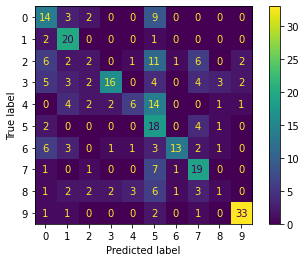

In [6]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Interpretation

In [7]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_yin/interpretation/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(
    base_path + "/topic_huffpost/model/best-model.pt"
)

# 3. Run Test
results = []
classes = [
    "This text is about Family & Relationships",
    "This text is about Health",
    "This text is about Science & Mathematics",
    "This text is about Entertainment & Music",
    "This text is about Computers & Internet",
    "This text is about Education & Reference",
    "This text is about Sports",
    "This text is about Society & Culture",
    "This text is about Business & Finance",
    "This text is about Politics & Government"
]

for sentence in text:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-09-08 15:20:46,964 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/topic_huffpost/model/best-model.pt
init TARS
Sentence: "what is the meaning of Linda ? LindaA set of parallel processing functions added to languages , such as C and C ++ , that allows data to be created and transferred between processes . It was developed by Yale professor David Gelernter , when he was a 23-year old graduate student ."   [− Tokens: 53  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9309)]}]
This text is about Computers & Internet
Sentence: "Anyone in the Dental field willing to fix my mouth for free ? I was taken advantage of by this Dentist who is now in jail . He ripped off the insurance co and took out most of my teeth . It will cost me thousands of $ $ $ to have my mouth fixed , I dont have the money , can anyone help or recommend call a dentist school . sometimes they are willing to fix your mouth , but it will still cost you , but cheaper ."   

Sentence: "Do you think God exists ? ? or are we just assuming there is God somewhere in the universe watching us ? ? ! ! ? Please give ur opinions with relevant reasons to support urselves. . `` ur experiences with God '' are also welcome. . Thanks ! ! = ) Of course there is some question of , `` Why are we here ? '' and the `` Meaning of life ? '' I believe strongly in God . I believe he sent his son down to earth to die for my sins , your sins , and everyone sins . Jesus , bridges the gap between God and us that was separated when Adam and Eve first turn their backs on him in the Garden of Eden . Sacrificing something pure , like a lamb , then was the gap filled . But then Jesus came , a pure being , God ’ s only son , he was like the lamb , pure and without sin , sacrificed for our sins to fill the gap between God and us . Believing in Jesus and accepting him into our lives fill that gap to God and we have access to eternal life . God is so significant in my life . My mother was ta

Sentence: "if you could change your name what will it be ? i think our names can affect our personality and how our lives unfold ... . do you ? I like the idea about how someone name affects his fate.I would name myself Yousef , Having a jewish name is cool ( I was thinking this is an arabic name but I have a jew friend with that name so its common between Arabs and Jews and it has the benefits of both : D ) His story as a prophet is also cool . Most handsome guy of the world , sold as a slave by his brothers , bought by a king , accused by a nympho , spent many years in jail , became king and returned to his family ."   [− Tokens: 134  − Sentence-Labels: {'label': [This text is about Health (0.15)]}]
This text is about Health
Sentence: "What is love ? Love is that thing that makes you do all the dumb things that you thought you would never do . Even thoug it hurts to love sometimes is something that we all could never live with out . Got a valentine ? im here . pabsicool @ yahoo.com" 

Sentence: "What dsl service is available for Alabama residents ? Try here , and select your area code to see a list.http : // www.thelist.com / areacode.html"   [− Tokens: 26  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.1289)]}]
This text is about Computers & Internet
Sentence: "MS Outlook rules allow me to create rules to filter spam . Why I am still notified when spam arrives ? MS Outlook 2002 ' s rules wizard allows me to create rules to dispose of spam . However I am still notified ( in my case via a pop-up window ) when spam arrives . How do I prevent being notified ? I do n't want to be interrupted from my work to look at spam ."   [− Tokens: 78  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9806)]}]
This text is about Computers & Internet
Sentence: "what do you currently have bookmarked ? hi5.spaces.msnanswers.yahoohsbc.egyptslidesworldatlas"   [− Tokens: 8  − Sentence-Labels: {'label': [This text is about Business & Financ

Sentence: "How do I animate using HTML ? you ca n't `` USE HTML '' ... you ' ll need some sort of dhtml or javascript , or even a little simpel asp.investigate about that.I suggest : http : // www.htmlgoodies.comvery good page about javascript and stuff.that Joe Burns guy , taught me a lot ."   [− Tokens: 55  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.974)]}]
This text is about Computers & Internet
Sentence: "IM MEETING SOMEONE OVER THE NET , SHOULD I ? i really dont know him. . IF IM NOT BACK IN 2 DAYS , CALL THE COPS ! ? I highly recommend cancelling this meeting . If you do not know him that well , DO NOT complete this meeting . He may be a sexual predator or a murderer , and I would wait a little bit longer and get to know him better before you think about meeting him ."   [− Tokens: 82  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.0344)]}]
This text is about Computers & Internet
Sentence: "can we insert a p4 processor for a

Sentence: "what is active directory ? LDAP ( Lightweight Directory Access Protocol ) is a software protocol for enabling anyone to locate organizations , individuals , and other resources such as files and devices in a network , whether on the public Internet or on a corporate intranet . LDAP is a `` lightweight '' ( smaller amount of code ) version of Directory Access Protocol ( DAP ) , which is part of X.500 , a standard for directory services in a network . LDAP is lighter because in its initial version it did not include security features . LDAP originated at the University of Michigan and has been endorsed by at least 40 companies . Netscape includes it in its latest Communicator suite of products . Microsoft includes it as part of what it calls Active Directory in a number of products including Outlook Express . Novell ' s NetWare Directory Services interoperates with LDAP . Cisco also supports it in its networking products . In a network , a directory tells you where in the netw

Sentence: "Help how to study ? I have an upcoming exam of 6 subjects . ( 3 are major and big while 3 are minor but not so easy ) I have started studying but its taking a lot time to cover even a single topic . this is because i first read the topic from one book ( the one i like ) and then from the other book ( the one other students study ) and then i make my own essay note out of it so that i need not see my textbooks before exams and only the notes.what i am asking is opinion is it worth to make such comprehensive notes or should i just read the text and highlight it and wait till the exam night to read it again ? the second method wil definitely take less time but i wo n't have notes at the end ? what do u think . I believe the time consuming way is the better option . Highlighting would be okay if you looked it over every day rather than waiting until the end of the semester at exam time . I learned to study by taking notes during the reading or lectures . Rewriting them clearly t

Sentence: "list of universities in the u.s. offering accelerated BSN ? There are several , but the two that come to mind readily are the University of Iowa and the University of nebraska / Lincoln"   [− Tokens: 34  − Sentence-Labels: {'label': [This text is about Education & Reference (0.4043)]}]
This text is about Education & Reference
Sentence: "plz tell me the famous instiututes for doing SOFTWARE TESTING COURSE with job gurantee.it should b in delhi . ? i m doin b.tech 3rd year n want to build my career in softaware testing.plz if u have , send me the related urls . U can go for any institute ... ... ... But u have to learn n apply urself ... .. I have heard few inst.like Ducat , and many more in Delhi ... ... . Look into newspaper ... . ."   [− Tokens: 85  − Sentence-Labels: {'label': [This text is about Computers & Internet (0.9537)]}]
This text is about Computers & Internet
Sentence: "How can I get an online trainning on records management ? I ' m newly employed person in the ar

Sentence: "What is the situation / setting of the poem ? The Raven Poem ? What is the situation / setting of the Raven ? How is the poem organized ? What is the poet trying to communicate to the reader ? Thanks I think the answer might be in here ... Once upon a midnight dreary , while I pondered , weak and weary , Over many a quaint and curious volume of forgotten lore -- While I nodded , nearly napping , suddenly there came a tapping , As of some one gently rapping , rapping at my chamber door . `` ' T is some visitor , '' I muttered , `` tapping at my chamber door -- Only this , and nothing more . '' Ah , distinctly I remember it was in the bleak December ; And each separate dying ember wrought its ghost upon the floor . Eagerly I wished the morrow ; -- vainly I had sought to borrow From my books surcease of sorrow -- sorrow for the lost Lenore -- For the rare and radiant maiden whom the angels name Lenore -- Nameless here for evermore . And the silken , sad , uncertain rustling of 

Sentence: "Why not having some SMS Jokes in today ' s Mobile World ? Come friends lets share and make the whole world laugh Micheal : Sir , I got thrince boys. . What names should I give them ? Ajit ( The Don ) : 1st boy ' s name - Peter , 2nd name - Repeter and 3rd one - Sheng Lee ! Micheal : Boss , why Sheng Lee ? Ajit : Idiot . Every 3rd child in dis world is chinese . *** Husband : 2day is sunday & I need to enjoy so I bought 3 movie tickets . Wife : why 3 ? Hubby : 4 u and ur parents . *** True luv is like a pillow . U can hug it when ur in trouble . U can cry on it when ur in pain . U can embrace it when ur happy . So , Wan na true luv ? spend 50 bucks and buy a pillow . *** Do u know wat do i do when i see someone extremely beautiful , Gorgeous , attractive , cute , fabulous ? .. I stare , I smile and when I get tired ... I put down the mirror . *** To live a life one needs brain , Looks , IQ , Knowledge and many more mental qualities . Hats off 2 u , coz u manage to live withou

Sentence: "my boyfriend ... . ? ok. we have been together for about six months and I ' m thinking about dumping him . I have n't gotton to spend much time with him and he ' s a bit immature . ( we ' re in middle school ) . So it ' s not that i hate him it ' s just that our relationship has gotton boring and when he acts immature it embarasses me . I tryed to talk to him about it before , and we ended up getting in a huge fight . what should i do now ? ? If you think it ' s time to leave , and you ' re ready , then It ' s probably best to break up . But do it nicely . Believe me , Breaking up can be very painful for the other person , and if you wan na remain friends , be nice about it ."   [− Tokens: 163  − Sentence-Labels: {'label': [This text is about Family & Relationships (0.9136)]}]
This text is about Family & Relationships
Sentence: "Does anyone have a good song for the Bridal to dance to during the reception . ? Most of my bridesmaids and groomsmen dont know each other well and 

Sentence: "What makes a woman decide to be a lesbian ? I do n't believe people choose their sexual orientation , we are all just who we are , attracted to whomever turns us on ."   [− Tokens: 35  − Sentence-Labels: {'label': [This text is about Society & Culture (0.6669)]}]
This text is about Society & Culture
Sentence: "So i guss there is only one thing i really really need to know ? Sizes tell me what do you think the averege penis size id ; ) Sarah Just thought i would through a redicules one in there You need to know a man who can take your weight for a long time"   [− Tokens: 55  − Sentence-Labels: {'label': [This text is about Health (0.822)]}]
This text is about Health
Sentence: "For Women to Answer - and Loons to Learn From ? Women , when you are being a jerk and are out of line with your guy , how do you want him to react to you ? A . To be the man and politely , but firmly tell you that you are out of line.B . Become amenable and fawning to try to please you ? C . Other ? C. 

Sentence: "Does anyone know how to treat psoriasis ? I am suffering from psoriasis on the scalp and a little on hands , and feet . Also , two of my nails have become disfigured and pitted due to psoriasis . Psoriasis is a common skin disease , affecting approximately 2 percent to 4 percent of the U.S. population . Skin cells grow too quickly , causing lesions of red , raised patches that are covered with silvery scales . Complete recovery is rare . Steps : 1 . Reduce stress . Psoriasis is significantly aggravated by stress . 2 . Apply topical ointments , twice each day , to slow down the overactive growth of skin cells . Ointments that contain tar preparations , anthralin and salicylic acid work well . Try corticosteroid creams . These are most effective when covered with a piece of saran wrap . It enhances the drug ' s penetration into the skin . Use it twice a day , wipe it off at bedtime , and then apply the tar preparation or anthralin at night . 3 . Avoid injuring the skin . This 

Sentence: "Hot flashes in your 30 ' s ? What should I do ? I am 31 years old and have had occasional hot flashes for 2 years . It ' s quite embarassing ! At first I thought maybe it was anxiety but I ' m not so sure anymore . I ' ve had my face get super red and hot just sitting at the computer by myself . Should I talk with a doctor ? If you have hot flashes , how long do yours last ? Sometimes my face stays red for quite a while . I would suggest you talk to your doctor . There are a few things that can cause hot flashes but only your doctor will be able to tell you for sure what ' s causing them . And try not to worry about it . ; - )"   [− Tokens: 147  − Sentence-Labels: {'label': [This text is about Health (0.9549)]}]
This text is about Health
Sentence: "what is lesbein ? what is the defination of lesbien.i mean what is lesbein . Women who are atrracted to women . It comes from greek . A young lady teacher ( dont remmember her name ) would right poems about her girl students . She

Sentence: "Does anyone know of any other test besides blood test to test for thyroid problems ? My husband had 2 docs tell him that he had all the symtoms of thryoid disease before they ran the blood test and when both test came back they were normal . He has heard that there is another test that can be done with a dye as an outpatient , does anyone know what they are talking about ? And is there any other problem that mimics thyroid disease ? In the `` Alternative Health '' circles , most will agree that the standard TSH ( thyroid stimulating hormone ) test does n't cut the mustard ! Its the one that most docs do . It can come back as a normal reading , but in fact the thyroid can be low . I have run into the same situation myself . Tests say normal , but I have all the symptoms of hypothyroid . I ' d do some research on the net . Too much info to put it all here.You could check out this link for starters : http : // www.wilsonssyndrome.com / There are also some links there to get you

Sentence: "What ' s the best way to battle depression ? My husband was deployed in the Army since January , and I ' ve noticed my depression become a lot worse . I was taking 100 mg of Zoloft before he left , but it does n't seem to help . What can I do ? I have no friends or family were I live . The only thing that ' s keeping me going is school and my pets . What can I do ? Please Listen ... ... I am a Psychology major and depressed . I take Zoloft . Academically all scientists know that depression stems from a serotonin loss . It is biological . My Professor in Anatomy said if she had n't taken an anti-depressant , she would be dead . Both her brothers killed themselves . Yes , it may be genetic , not always . The brothers did n't buy into the `` taking pills '' theory . Meanwhile , she took the recommended dosage and went on to get her PH.D.I take 100 mg. of Zoloft every day . When I become more symptomatic , I increase it to 200 mg. a day . I fluctuate . Would n't you rather be ha

Sentence: "The elements that were key to Great Britain ' s industrial success was ? world war 2 began with Germany ' s invasion of ? POLAND.BUT THE IND . REV . STARTED 200 YRS . BEFORE . THE I . R. WAS BROUGHT ABOUT BY INVENTIONS SUCH AS THE MECHANICAL LOOM.IT WAS A TWO PART REV . AGRICULTURAL AND INDUSTRIAL . THE AGRI.REVOLUTION FLOURISHED WITH THE SEED DRILL TO HELP LANTING WHICH HELPED GROW CHEAPER FOOD , WHICH HELPED PEOPLE EAT BETTER ( MORE MONEY FOR FOOD ) . BUT THEY FED THE SHEEP BETTER FIRST SO RICH LANDOWNERS COULD MAKE MORE WOOL FOR THE MILLS . WHAT BASICALLY HAPPENED WAS THE RICH DROVE PEOPLE FROM THERE LAND TO GROW MORE CROPS AND DROVE THE POOR TO HORRID LIVING CONDITIONS IN THE CITY WORKING FOR THE MILLS AND THE MINES . THEY WORKED CHILDREN , WOMEN , AND MEN ALIKE , OFTEN FOR 12-16HR . DAYS.FOR BARELY ANY MONEY THEN WERE CHARGED EXORBITANT PRICES FOR SLUM HOUSING AND FOOD WHICH WAS ALL CONTROLLED BY THE COMPANY THEY WOKED FOR.THE WORKING CONDITIONS CAUSED DEFORMATIES ( HEA

Sentence: "What do you really think of George W. Bush , the president of the United States of America ? A fool , a hero ? Let me know your thoughts about him ! George W. Bush is a multifaceted man . He is definitely a social conservative -- and in that , he and I have absolutely nothing in common -- , but he is also not a raging nationalist ( and I celebrate the latter , especially with regards to immigration ) . He is pro big business , but he is not an economic conservative ( his administration ' s spending is extraordinarily high ) . It also is the case that there have been spectacular changes between the two administrations he ' s lead . The first four years were dominated by dismal decision-making , war-mongering , deception , terrible self-inflicted damage to the image of the US internationally , foolish foreign policy , etc . The second Bush administration has been orders of magnitude better on the foreign policy front , with Condoleeza Rice at the helm ( now the US is finally l

Sentence: "Famous people from Ohio who are deceased ? John Wayne , I do n't remember his real name but was born in Ohio ."   [− Tokens: 24  − Sentence-Labels: {'label': [This text is about Entertainment & Music (0.5992)]}]
This text is about Entertainment & Music
Sentence: "Is it true AARP is telling Seniors to stay away from the polls as FOX news is reporting ? No . I got a postcard a couple of weeks ago listing all the candidates in my state that AARP supports . Why would they spend that kind of money then tell people not to vote ?"   [− Tokens: 56  − Sentence-Labels: {'label': [This text is about Business & Finance (0.9429)]}]
This text is about Business & Finance
Sentence: "how can i get my boyfriends warrent ammended for child support when we are still together ? LOL ... you sure can pick'em ."   [− Tokens: 24  − Sentence-Labels: {'label': [This text is about Family & Relationships (0.2267)]}]
This text is about Family & Relationships
Sentence: "Which is the smartest thing a liber

Sentence: "how to calculate the geometric factor for the schlumberger array ? geo electrical profiling can be done with fixed electrical electrodes and move only potential electrodes . I would like to know the formula I can use to calculate the geometric factor k for the different spacings The formula will be determined by several factors.Firstly you need to quantify the paralax of your electrodes when taken as a constant , then select your test apmere rate . This must be kept constant to give your results continuity.The geometric factor can be determined either as a spacial value or a multi-dimensional cascade equation using the derivative of the base line through force as emitted by the polarised ion array under the radial effect of the ipnosis effect which can be detected using the omnidirectional fortence analyser ( if available ) When these values are determined you must apply the correct formula which , as I have a standard keyboard which does n't allow formulaic typing , I ' m n

Sentence: "Is it true - and how - that time does n't exist in reality ? Could it truly exist in another dimension and how ? Well , to give a proper philisophical answer to this question you would have to define the meaning of : TrueExistRealityTime is a perceived arrow and we have provided a quantity to it by measuring repetitive features of planetary movement"   [− Tokens: 65  − Sentence-Labels: {'label': [This text is about Science & Mathematics (0.9971)]}]
This text is about Science & Mathematics
Sentence: "Was Darwin correct , my brother is descended from a monkey ? Humans ( and your brother ) are not descended from monkeys as such but share a common ancestor with all primates from which we evolved . Chimpanzee ' s actually share a 90 % + similar gene structure to humans. . The fact that you and your brother share the same biological parents would result in you having as much primate tendency as he does ... just dont eat all the bananas !"   [− Tokens: 85  − Sentence-Labels: {'labe

Sentence: "what is the origin of life ? Research into the origin of life is a limited field of research despite its profound impact on biology and human understanding of the natural world . Progress in this field is generally slow and sporadic , though it still draws the attention of many due to the gravity of the question being investigated . A few facts give insight into the conditions in which life may have emerged , but the mechanisms by which non-life became life are still elusive.For the observed evolution of life on earth , see the timeline of life.Research into the origin of life is the modern incarnation of the ancient concept of abiogenesis . Abiogenesis , in its most general sense , is the generation of life from non-living matter . The term is primarily used in the context of biology and the origin of life . Abiogenesis was long considered to be a very common occurrence until the Law of Biogenesis ( omne vivum ex ovo or `` all life from an egg '' ) became firmly established

Sentence: "are ghosts real ? have u ever seen one ? are they scary ? Hi - I believe in ghosts , I have one or two in my house , laugh if you like I do n't care ! I live in a little cottage in County Antrim , and strange things are always happening , in my hall I have a lamp that switches itself off only when my husband passes by it , we have had friends and family walk past it to test it but it only happens to him - in that hallway a saw a little boy with dark hair and wearing a striped t-shirt and shorts skipping past our living room door , we do not have children there is only the 2 of us . Also my husband was working in the garage and he dropped his hammer but continued working on , when he bent down to pick it up about 10 mins later it was sitting on the stepladders beside him - it totally freaked him out . We hear voices and once even singing . My house does'nt feel evil or creepy , but a happy place . My father-in-law was mucking out our stables and heard some-one speaking - he a

Sentence: "Who do you think is going to win Food City 500 this weekend ? Matt Kenseth . Dale JR. is a safe bet . Maybe Kurt Busch.besides those 3 the top 10 will be ; Denny Hamlin , kevin harvick , Elliot saddler , Dale Jarret , Jeff gordon , Greg Biffle , and Jeff Burton.Bristol is a hard one to call . A lot of time a driver could win by process of elimination ."   [− Tokens: 76  − Sentence-Labels: {'label': [This text is about Sports (0.9871)]}]
This text is about Sports
Sentence: "WHO will win , Tony or Jimmie ? WHO ' S gon na win Texas ? I think Jimmie"   [− Tokens: 19  − Sentence-Labels: {'label': [This text is about Sports (0.9854)]}]
This text is about Sports
Sentence: "for england you are very close to win this Cup just tim is very very strong ay didn t soo something like that ? you are illiterate and your question does n't make sense"   [− Tokens: 34  − Sentence-Labels: {'label': [This text is about Sports (0.9924)]}]
This text is about Sports
Sentence: "Will Walsall get promo

In [8]:
print(report)

                                           precision    recall  f1-score   support

    This text is about Business & Finance       0.45      0.53      0.49        38
  This text is about Computers & Internet       0.60      0.89      0.72        38
 This text is about Education & Reference       0.44      0.24      0.31        33
 This text is about Entertainment & Music       0.65      0.41      0.50        32
This text is about Family & Relationships       0.57      0.38      0.45        32
                This text is about Health       0.51      0.90      0.65        39
 This text is about Politics & Government       0.89      0.39      0.54        41
 This text is about Science & Mathematics       0.49      0.73      0.59        30
     This text is about Society & Culture       0.22      0.17      0.19        30
                This text is about Sports       0.74      0.71      0.72        24

                                 accuracy                           0.54       337
  

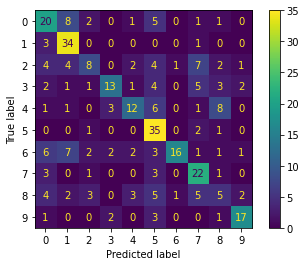

In [9]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Wordnet

In [ ]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_yin/wordnet/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_huffpost/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "a social unit living together",
    "a particular branch of scientific knowledge",
    "an activity that is diverting and that holds the attention",
    "a machine for performing calculations automatically",
    "knowledge acquired by learning and instruction",
    "an active diversion requiring physical exertion and competition",
    "an extended social group having a distinctive cultural and economic organization",
    "the commercial activity of providing funds and capital",
    "the study of government of states and other political units",
]

for sentence in text:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-09-08 15:21:07,276 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/topic_huffpost/model/best-model.pt
init TARS
Sentence: "Do I have to pay taxes on my points ? ? I hope not . I just got to level 3 and if I do have to pay then I ' m going to be in trouble . 21-47 % depending on your other sources of points ."   [− Tokens: 48  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.649)]}]
the commercial activity of providing funds and capital
Sentence: "what is the best way to find people you have not heard from in a long time , lost friends or family free or not ? friends from high school ... go to classmates.com ."   [− Tokens: 35  − Sentence-Labels: {'label': [a social unit living together (0.4883)]}]
a social unit living together
Sentence: "What kind of jobs are there specifically available in the so called `` corporate world '' ? ? The corporate world means for-profit corporations ; everything that is n't Government , Non-

Sentence: "should i get off the computer ? got the day off work should do some jobs around the house but i cant seem to turn answers off any one the same ? do a bit of both. . do some housework , then answer some questions , i , m at home with a cold , but that doesnt stop me ."   [− Tokens: 62  − Sentence-Labels: {'label': [a social unit living together (0.2864)]}]
a social unit living together
Sentence: "How can I live forever ? Not dieing"   [− Tokens: 8  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.1099)]}]
knowledge acquired by learning and instruction
Sentence: "I have an internet business . How do I gain peoples trust ? I know that I ' m honest , how do I get people to give me a chance ? The most important sign to a trustworthy merchant is a secure website . Many merchants look for a website that is secured with an SSL certificate . The design of the website can impact whether someone will make a purchase or not . A reputable site will look rep

Sentence: "are my Questions easy ? what shall we do , easy person"   [− Tokens: 12  − Sentence-Labels: {'label': [an extended social group having a distinctive cultural and economic organization (0.0339)]}]
an extended social group having a distinctive cultural and economic organization
Sentence: "i need a spell for invoking the spirits ? try a Quija board and some incense !"   [− Tokens: 17  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.36)]}]
knowledge acquired by learning and instruction
Sentence: "are aliens real ? Yeah , you ' re talking to one ."   [− Tokens: 13  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9916)]}]
a particular branch of scientific knowledge
Sentence: "Administration work ? I have a combined 10 years experience of administration work , all done at various employers inth West Midlands , England.Can anybody tell me how I can progress my career in administration to reach senior levels where job will 

Sentence: "My computer power supply died - what do i need to do to swtich the hard drive to another computer - regarding ? in terms of SW and OS ? i have another computer that has a bad hard drive and would liek to put the hard drive from the power failed computer in it . what do i have to do regarding sw and os configuration ? thanks well in case u want to pull back the older hard drive from the other computer u ' ll have to put in the good drive into the same first ide slot and make sure that the jumper is set to make the good drive a master ( the jumper is a small plug situated at the back end besides the power supply socket of the hard drive -- hope u know what i ' m talking abt ) next u will have to boot the computer from the hard drive now here u might experience a problem if both the mother boards are not of the same model as the drivers on the new drive will be different from the ones required for the new mother board ... so press F8 ( or u may do without is altogether ) and tr

Sentence: "What is Microsoft Excel ( xls ) ? Excel is the spreadsheet that comes with Microsoft Office.A spreadsheet is , at its most basic , a grid of boxes where you can enter numbers and equations . Each box ( called a cell ) has a specific address , based on the row number and the column . The first cell is A1 , the one below it is A2 , and the one to the right of it is B1 . Pretty simple so far , right ? Knowing no more than this , you can use Excel as nothing more than a convenient editor for tabular data . In fact , this is primarily what Excel is for ... except instead of just putting in tabular data it can also calculate the data for you.Here ' s an example : I had a garage sale recently and recorded each sale in the spreadsheet . It was pretty simple . ( Actually , I ' m lying to you . It was a complex spreadsheet that tracked a lot of different things like donor , category , and sales goals , but I ' m simplifying it for this answer . It COULD have been a simple spreadsheet 

Sentence: "what are the qualities of a good paragragh ? A good paragraph should have a topic sentence , supporting details , and a conclusion . The topic sentence tells what you are going to talk about . Supporting details give the reader more information . The conclusion restates what was said in the topic sentence . A good paragraph should also have correct spelling , capitalization , and punctuation . Your sentences in the paragraph should include good descriptive words and not begin with and , but , or because ."   [− Tokens: 91  − Sentence-Labels: {'label': [a machine for performing calculations automatically (0.6452)]}]
a machine for performing calculations automatically
Sentence: "( crossword ) untangle max peel , for instance ( 7 letters ) answer is e ? a ? p ? e ( please complete ) ? example"   [− Tokens: 28  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.3674)]}]
an active diversion requiring physical exertion and competition


Sentence: "Some sentences im havng difficulty with ? 1 ) I was in the ... of despair before i heard the good news.A : pits B : abyss C : depths D : valley2 ) The girl managed to ... . a conversation while doing her homeworkA : carry out B : keep up C : make out D : go on3 ) Local residents have complained about the music constantly ... . from the club.A : blaring B : roaring C : booming D : thundering4 ) The film ' s success is amazing ... . the poor reviews it has recieved.A : considering B : seeing C : remarking D : evaluatingYour answers could be like 1-a 2-c and so on . . : D thanks 1 . A OR C ( heard it both ways ) 2 . B3 . A4 . ABy the way , not a lot of people would use # 1 the way it is . Most people would say something like `` Wow , I felt like crap until I heard the good news . '' ( Or something like that . )"   [− Tokens: 190  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.856)]}]
an activity that is diverting and that holds the a

Sentence: "ok american history , help please ... ? there is this quiz my teacher gave us and told us to take it home and finish it . i got most of the questions but i am stuck on some of them and my twin wo n't give me the answers.it is ok if u do n't get some of them b / c my dad did n't get some either , they r like hard questions.1.law and order contract written in colonial america2.economy of the middle colonies3.science of farming in the southern colonies4.type of farms that existed bacause of slavery5.wrote the constitution for his colony6.reason for colonization used by king george the IIIi have notes but i ca n't find the answers for these questions b / c i do n't get wat the question is asking . You can get the answer to aleast most of this questions by investigating this website http : // en.wikipedia.org / wiki / Colonial _ AmericaGood Luck ! ! !"   [− Tokens: 167  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.6691)]}]
knowledge acquired by 

Sentence: "What is a ti-bo and what is the proper spelling ( something to do with recording tv shows-need more info ) ? It is a form of martial art . It is spelled Tai-bo ."   [− Tokens: 35  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.7044)]}]
knowledge acquired by learning and instruction
Sentence: "who ' s watching big brother tonight ? who wants to see grace get publicly slandered for being the biggest two faced f * cking bi @ tch that ever graced this planet ( ha ha see what i did there ) ? As much as the show is lame and stupid I would have to admit its flippin unmissable at the moment ! ! ! ! I ' ve never seen so much bitching and back stabbing ... .. its fab ! ! ! I for one will be watching it and I hope two faced Grace gets booted ! LONG LIVE PETE ! ! ! ! LOL ( I really need to get a life ) ... . ."   [− Tokens: 121  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9521)]}]
an activity that is divert

Sentence: "does anyone live around fort gratiot who would like to be in a band with 2 13 old girls and 1 15 old ? my freinds and i r very serious about starting a band im looking to see if anyone around fort gratiot or port huron has guitar , drums , writing songs , or composing skills.and would be interested in being in a band , and making the commitment.so far we have 2 13 year old girls and 1 15 years old girl . no , but good luck to you"   [− Tokens: 93  − Sentence-Labels: {'label': [a social unit living together (0.325)]}]
a social unit living together
Sentence: "How old is Jay-Z A.K.A . Hova ? cam'ron from dipset said that he ' s 42 years old true or false Shawn Corey Carter ( Jay-Z ) was born December 4 , 1969 . That would make him 36 years old ."   [− Tokens: 43  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.7823)]}]
the commercial activity of providing funds and capital
Sentence: "how much is for a rock band concert ticket , e.g . Simp

Sentence: "What is that one song in some movies. . please help ? The song is like a symphany / orchastra , and its the song that builds up to intense moments ... ba da bum bum ... ba da bum bum , and it has those ladys in the backround chanting kinda with the music . WHAT IS THAT SONG CALLED , I NEED IT Is it ' Ride of the Valkyries by Wagner ? I just tried to use your ba da bum bum , ba da bum bum ... Do it really fast in your head and that ' s my guess and I ' m sticking to it ; o )"   [− Tokens: 114  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.935)]}]
an activity that is diverting and that holds the attention
Sentence: "The singing group Pussy Cat Dolls do they suck or is it just me ? dont get me wrong they have their one hit wonder but what is all the hype with them ? I think they are terrible , but I still like them.Just kidding , they ' re disgusting ."   [− Tokens: 52  − Sentence-Labels: {'label': [an activity that is diverting and

Sentence: "what is it about nice girls / boys why do we ALWAYS finish last ? i was raised that you treat others the way that you want to be treated . so now i am in the dating scene and i always end up the little sister of the group . mean while i watch as my friends and the guys that i like end up with just horrible people . enough so that i decided to take a break . i am just so frustred with this that i dont know what to do . Hi , Finish last ? Relationships are built on trust , compromise , love , caring , and wanting to make another happy ; doing everything you can to make it so.I ' ve been married now for 29 yrs to a wonderful woman . First marriage ended in Divorce after 7 yrs.I am one of the `` good guys '' ; respecting others.Do n't change yourself ; be honest and open.Ending with horrible people is their choice ! ! ! If you are selective , dating can be fun . Chose someone to date who has similar likes as you ... . who seems to be trusting and honest.You ca n't lose ! Do n't 

Sentence: "What kind of fancy restaurant should I take my girlfriend to ? I have been seeing this girl for a while now and we ' ve only been going to regular restaurants on our dates so far . She has n't had any problem with it yet but I really want to show her how special she is to me . What kind of restaurant should I take her to next ? dont take her to a restraunt . take her out on a picnic by a larg romantic body of water where no one will bother you"   [− Tokens: 98  − Sentence-Labels: {'label': [a social unit living together (0.5138)]}]
a social unit living together
Sentence: "Is it really better to have loved and lost than to not have loved at all ? ? what are your thoughts . After a loss , it sure does n't seem like it . Nonetheless , love is one of the best parts of the human experience . You must also remember that having lost what might have seemed your true love does n't mean that you will never love again . Those with such a capacity for love do find love again , and love 

Sentence: "Do you think a lonely housewfie should stay lonely ? Do you think a wife can have a social friendship without being unloyal to her husband ? My hubby works like 60 + hours a week 6 days and he has no interest in me at all when he gets home , but I believe someone would . I do n't want to cheat I just want to think that I have value again , is that wrong ? You ca n't let your soul die because your husband is not meeting your needs . Get what you need from whatever source you can . Marriage should not do to you what you are describing and you have to do what you can to help yourself ."   [− Tokens: 127  − Sentence-Labels: {'label': [a social unit living together (0.5753)]}]
a social unit living together
Sentence: "hi , has any of you gone trekking in scotland ? I ' m planning a trip there , do you know any nice trekking group there THERE ARE LOTS OF ADVENTURE CENTRES IN SCOTLAND ... JUST WRITE TO THE SCOTTISH TOURIST BOARD ... .. THERE IS A SITE ON LINE"   [− Tokens: 51  − Sen

Sentence: "How long does mood swings last with menopause ? My mother is a bitch . The last few months have been HELL . She is 49 and i think is menopause ... so HOW LONG DO WE HAVE TO LIVE WITH HER LIKE THIS ? ! ? ! ? ! ? ! ? ! ? ! ? ! ? ! ? ! is there some kind of laxitive that i can slip her to make her moodyness leave faster ? PLEASE HELP I feel for you. . my mom went through it when i was a teenager . It was horrible . Now for the horrible horrible news . It will go on until she has a Hysterectomy or they put her on the correct medication . My mother ' s last about 3 years . I just made sure I was n't NEVER HOME.First is about menopause and the second link its to hystoerctomy"   [− Tokens: 155  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.9054)]}]
knowledge acquired by learning and instruction
Sentence: "Peeing CANT STOP CANT GO ! ! ! ! HELP ! ! ! ! ! PLEASE ! ! ! ! ! ? I m a teenager and have a peeing promblem . The thing is , around 3 times per 

Sentence: "to the male ? Do u like to have boobs ! Yes.Very much ... ... ... ... ... I would like to have boobs in my mouth and in my hands.I mean I like to have my girl ' s boobs in my mouth and in my hands : )"   [− Tokens: 50  − Sentence-Labels: {'label': [knowledge acquired by learning and instruction (0.5144)]}]
knowledge acquired by learning and instruction
Sentence: "Please help me : ( Why am I so worried ? Ahh , okay here I go . I know this may sound stupid to most of you , but I do n't know : ( Well , I was with this guy from September 8th - 12th and although we did not engage in sexual intercourse , I gave him a handjob and he fingered me . Although his fingers were n't like `` dripping '' with his semen or anything , I ' m worried MAYBE there might have been * some * of it on him . He also never went inside of me , he was just rubbing `` down there '' Well , I got my full period three days later ( on Sept. 15 ) and got my period again on ( although it was late like 2-3 days 

Sentence: "remedy to continue to enjoy sex ? wha is the cause that u feel your vagina width expands . Try not to put anything too big in there for a while , wash w / hot water , and rinse w / ice-cold lemon juice.This should shrink things uo and cause a nice tight pucker . Good luck !"   [− Tokens: 59  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.0642)]}]
a particular branch of scientific knowledge
Sentence: "how do i wear a condom ? See Resources Below . They pretty much say the same thing . Step-by-steps for putting a condom on and using it ."   [− Tokens: 29  − Sentence-Labels: {'label': [a social unit living together (0.0101)]}]
a social unit living together
Sentence: "Orlistat ( a.k.a . Xenical ) Does this drug work ? Yes it does ."   [− Tokens: 15  − Sentence-Labels: {'label': [the commercial activity of providing funds and capital (0.8998)]}]
the commercial activity of providing funds and capital
Sentence: "Is this normal ? I ' m 13 years old and 

Sentence: "Does anyone else think America is headed towards a police state ? The Internet ' s dictionary.com website defines `` police state '' as : `` A state in which the government exercises rigid and repressive controls over the social , economic and political life of the people , especially by means of a secret police force . '' as General Tommy Franks recently suggested , that moment will come when yet another serious terrorist attack , provoked and instigated by our own meddling , interventionist , imperialistic government , occurs on our soil . All the necessary “ laws ” are now in place ! Never mind that they are all completely unconstitutional ! And never mind as well that the finishing touches of our unconstitutional “ laws ” have been finalized and put in place by a “ limited government ” Republican administration ! America is now “ legally ” a police state ! Personaly , I think America is being destroyed by design.It doesnt matter who gets elected as President , they are j

Sentence: "Looking for info on the Sullivan rule as per `` only child '' , in combat . ? Contrary to popular belief , `` only sons , '' `` the last son to carry the family name , '' and `` sole surviving sons '' must register for the draft , they can be drafted , and they can serve in combat . However , they may be entitled to a peacetime deferment if there is a military death in the immediate family . Provisions regarding the survivors of veterans were written into Selective Service law after World War II . Details have varied over the years , but the basic premise remains the same ; where a family member has been lost as a result of military service , the remaining family members should be protected insofar as possible.It is important to keep in mind that the provisions are directly related to service-connected deaths . The mere fact that a man is the only child or only son does not qualify him for consideration - he must be the survivor of one who died as a result of military servic

Sentence: "For those who want Bush impeached and removed from office , how do you propose it be done ? Impeachment is the process of bringing a federal officer ( President , Vice President , federal judge , etc . ) up on charges . It is not a conviction , or a removal from office . Only the U.S. House of Representatives has the power to impeach , and it only takes a simple majority . The U.S. Senate is where the trial is held , and it takes a 2 / 3 majority to convict and remove from office.Since the Dems have enough votes in the House ( once they take office in January ) to impeach , but nowhere near enough votes in the Senate , how do you propose they go about removing Bush ( and Cheney ) from office ? Or , in other words , how would you convince 16 Repubs to vote against their party and commit political suicide ( It takes 67 votes , and the Dems only have 51 ) ? ever notice that the idiot liberals never seem to elaborate that . the sad part about that is when you compare slick willi

Sentence: "A 900MHz GSM network required a C / I = 9dB to provide Rxqual < = 5 for the BCCH channel and C / I of 3 to 4dB with s About 300 mW ought to do it . Um , what is the rest of the question ?"   [− Tokens: 49  − Sentence-Labels: {'label': [a machine for performing calculations automatically (0.8947)]}]
a machine for performing calculations automatically
Sentence: "a man is infertile because his slerm can not `` swim '' . which cellular organelle is malfunctioning ? The flagella . Flagella makes the sperm swim . If the sperm ca n't swim then the flagella is malfunctioning ."   [− Tokens: 40  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9724)]}]
a particular branch of scientific knowledge
Sentence: "whats your filling as a medical student ? ."   [− Tokens: 9  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.1581)]}]
a particular branch of scientific knowledge
Sentence: "what ' s the percentage of earth ' s water is drinke

Sentence: "How much longer ? Until our sun ( star ) goes supernova ? I love reading about our solar system ! And I love anything to do with space ! When do you think Our sun ( star ) will go supernova ? Our sun will never go supernova . Only the largest stars go supernova ; ours is only about mid-sized . It has been around for about 5 billion years and has an estimated lifespan of 10 billion years . So , you ' ve got another 5 billion years to relax before the sun ' s energy runs out.Having said that , the Earth will not be habitable during that whole period . In about 2 billion years the sun will eject part of its core , becoming a red giant . It will grow dimmer but hotter . While the new outer limit of the sun will only reach out to about Venus ' s orbit , the extreme heat will incinerate all life on Earth.After the sun ' s lifespan is up , it will collapse back in on itself , forming a white dwarf . It will continue to emit a small amount of energy in this form as it cools down ove

Sentence: "Should I work on Sunday at the request of my parents-in-law ? My parents-in-law are both fishermen . They are planning to ask me to help them with some work this Sunday to prepare for fishing on Monday . My family is currently living with them for a brief period of time . They know that I dislike working on the Sabbath Day and that I wish to set a good example for them . I think I would feel uncomfortable agreeing to work on Sunday , but I want to be respectful to them as well . Should I honour their request ? I am seeking the advice of Christians . `` Remember that thou keep holy the Sabbath day . Six days shalt thou labour and do all that thou hast to do ; but the seventh day is the Sabbath of the Lord thy God . In it thou shalt do no manner of work ; thou and thy son and thy daughter , thy man servant , and thy maid servant , thy cattle and the stranger that is within thy gates . For in six days the Lord made heaven and earth , the sea , and all that in them is , and rest

In [ ]:
print(report)

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()